In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Setup plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

/kaggle/input/sri-lanka-weather-dataset/SriLanka_Weather_Dataset.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Extracting the medical insurance data
weather = pd.read_csv('../input/sri-lanka-weather-dataset/SriLanka_Weather_Dataset.csv')
weather.head(5)
cities = pd.DataFrame({'Cities' : weather.city.unique()})
cities

,Cities
0,Colombo
1,Mount Lavinia
2,Kesbewa
3,Moratuwa
4,Maharagama
5,Ratnapura
6,Kandy
7,Negombo
8,Sri Jayewardenepura Kotte
9,Kalmunai


# Visualizing Data for Kandy

In [4]:
cities = weather.city.unique()
#collecting data for kandy
weather_sl_kandy = weather[weather['city'] == 'Kandy']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_kandy.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_kandy = weatherDate.drop(columns = ['country', 'temperature_2m_mean', 'sunrise', 'sunset','apparent_temperature_mean','snowfall_sum', 'longitude', 'latitude', 'elevation'])
#separating year, month, date from time
weather_kandy['year'] = weather_kandy['time'].dt.year
weather_kandy['month'] = weather_kandy['time'].dt.month
weather_kandy['day'] = weather_kandy['time'].dt.day
weather_kandy = weather_kandy.drop(columns = ['time'])
weather_kandy.reset_index(inplace=True, drop=True)
#bringing days column in front
col = weather_kandy.pop('day')
weather_kandy.insert(0, col.name, col)
col2 = weather_kandy.pop('month')
weather_kandy.insert(0, col2.name, col2)
col3 = weather_kandy.pop('year')
weather_kandy.insert(0, col3.name, col3)
weather_kandy = weather_kandy.drop(columns = ['city'])
weather_kandy.head()

,year,month,day,weathercode,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,shortwave_radiation_sum,precipitation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2010,1,1,2,25.3,18.7,27.2,20.3,18.09,0.0,0.0,0.0,15.3,38.9,57,3.43
1,2010,1,2,2,25.6,19.4,28.4,21.6,15.47,0.0,0.0,0.0,13.3,33.1,46,2.95
2,2010,1,3,51,25.0,19.5,28.2,22.1,14.99,0.1,0.1,1.0,10.7,28.1,40,2.84
3,2010,1,4,51,25.3,19.0,27.7,21.3,16.55,0.6,0.6,2.0,10.4,29.2,23,3.16
4,2010,1,5,1,25.0,16.3,28.0,17.5,22.68,0.0,0.0,0.0,9.7,27.0,28,4.18


Text(0.5, 1.0, 'Monthly Rainfall from 2010 - 2020 in Sri Lanka')

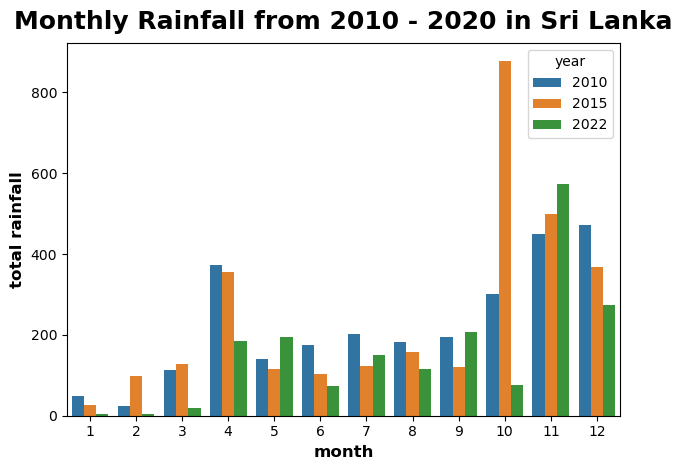

In [96]:
months = weather_kandy.month.unique()
annual_rainfall = weather_kandy.groupby(['year', 'month']).rain_sum.sum()

annual_rainfall = annual_rainfall.reset_index(name = 'total rainfall')
annual_rainfall = annual_rainfall.set_index('month')

def annualRain(year) :
    rain = annual_rainfall.loc[annual_rainfall.year == year]['total rainfall']
    return rain

monthly_rainfall_by_year = pd.DataFrame({ 'month' : months,
                                         '2010' : annualRain(2010),
                                         '2015' : annualRain(2015),
                                        '2022' : annualRain(2020)},
                                 )
monthly_rainfall_by_year = monthly_rainfall_by_year.melt('month', var_name='year', value_name='total rainfall')
sns.barplot(y = 'total rainfall', x = 'month', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall from 2010 - 2020 in Sri Lanka')

**2015 flooding and extreme weather conditions due to higher than usual rainfall during October